In [1]:
import my_module as mm
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)

In [4]:
convs = [8, 16, 24, 32]
fcs = [1024, 512, 64]

training_error = []
testing_error = []
epoch_sizes = [5, 10, 11, 12, 13, 14, 15]
seed = 1234
count = 0

DIR_PATH = './model/'
mm.os.makedirs(DIR_PATH, exist_ok = True)

for m_tr in epoch_sizes:
    curX = X[:len(X)]
    cury = y[:len(X)]
    net = mm.Net2(1, 350, 350, 8, convs, fcs)
    if mm.torch.cuda.is_available():
        mm.torch.cuda.empty_cache()
        net.cuda()
    Xtr, Xva, ytr, yva = mm.train_test_split(curX, cury, test_size=0.1, random_state=seed, shuffle=True)
    trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva, batch_size = 128)
    net = mm.train_process2(device, net, trainloader, LR = 1e-5, EPOCH = m_tr, PRINT = 5)
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    PATH = DIR_PATH + "model_" + str(count) + ".pth"
    mm.torch.save(net.state_dict(), PATH)
    count += 1
    print("Done for model", count)

CrossEntropyLoss()
[1,     5] loss: 2.020
[1,    10] loss: 1.888
[1,    15] loss: 1.824
[1,    20] loss: 1.811
[1,    25] loss: 1.774
[1,    30] loss: 1.775
[1,    35] loss: 1.780
[1,    40] loss: 1.805
[1,    45] loss: 1.798
[1,    50] loss: 1.792
[1,    55] loss: 1.737
[1,    60] loss: 1.777
[1,    65] loss: 1.811
[1,    70] loss: 1.760
[1,    75] loss: 1.789
[1,    80] loss: 1.781
[1,    85] loss: 1.787
[1,    90] loss: 1.766
[1,    95] loss: 1.755
[2,     5] loss: 1.783
[2,    10] loss: 1.749
[2,    15] loss: 1.758
[2,    20] loss: 1.759
[2,    25] loss: 1.780
[2,    30] loss: 1.785
[2,    35] loss: 1.726
[2,    40] loss: 1.749
[2,    45] loss: 1.759
[2,    50] loss: 1.747
[2,    55] loss: 1.774
[2,    60] loss: 1.777
[2,    65] loss: 1.779
[2,    70] loss: 1.792
[2,    75] loss: 1.784
[2,    80] loss: 1.780
[2,    85] loss: 1.784
[2,    90] loss: 1.780
[2,    95] loss: 1.807
[3,     5] loss: 1.770
[3,    10] loss: 1.766
[3,    15] loss: 1.780
[3,    20] loss: 1.780
[3,    25] loss

[0.440548656764873, 0.23171820469117765, 0.2217352487622758, 0.24129534940345754, 0.2269296323350377, 0.4973622270919569, 0.23658793929064204]
[0.4470416362308254, 0.25785244704163623, 0.24981738495252004, 0.27465303140978814, 0.2505478451424398, 0.5142439737034332, 0.2571219868517166]


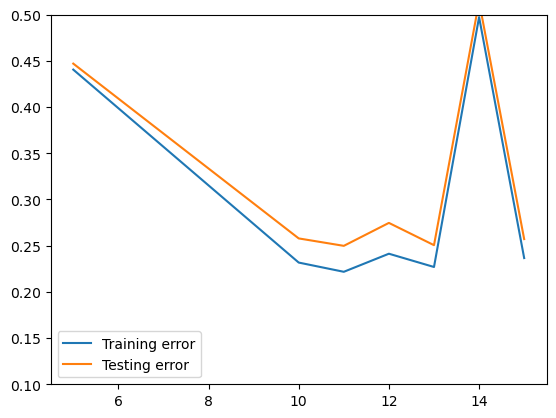

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime
print(training_error)
print(testing_error)

plt.plot(epoch_sizes, training_error, label="Training error")
plt.plot(epoch_sizes, testing_error, label="Testing error")
plt.legend()
plt.ylim(0.1, 0.5)

FIG_PATH = './plot/'
mm.os.makedirs(FIG_PATH, exist_ok = True)
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"report_test_{current_time}.png"
plt.savefig(FIG_PATH + filename)